## Preprocessing

In [1]:
# import dependencies

import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer

In [2]:
# download the dataset

nltk.download("twitter_samples")

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
# separate positive and negative tweets

positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
# check the size of positive and negative tweets

positive_length = len(positive_tweets)
negative_length = len(negative_tweets)

In [5]:
print(positive_length)
print(negative_length)

5000
5000


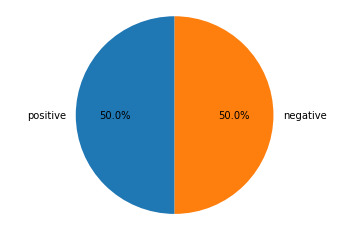

In [6]:
# plot a pie plot to compare positive nad negative data size
#plt.figure(figsize = (10,10))
plt.pie([positive_length, negative_length], labels=('positive', 'negative'),autopct = '%1.1f%%',shadow = False, startangle = 90.0)
plt.axis('equal')
plt.show()

In [7]:
# check data type 

print(type(positive_tweets))
print(type(positive_tweets[random.randint(0,5000)]))

<class 'list'>
<class 'str'>


In [8]:
# print a sample tweet

print('Sample Positive Tweet:')  
print(positive_tweets[random.randint(0,5000)])
print()
print()
print('Sample Negative Tweet')
print(negative_tweets[random.randint(0,5000)])

Sample Positive Tweet:
@blossominglou yes pls :)))


Sample Negative Tweet
the most common lie in th wolrd is..
i m fyn :-(
...


Preprocessing Steps:
1.   Tokenize
2.   Lowercasing
3.   Remove stopwords, punctuation, URLs, Handles
4.   Stemming



In [9]:
# take a sample tweet

sample = positive_tweets[2277]
print(sample)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [10]:
# remove hyperlink and tweeter marks

sample_1 = re.sub(r'https?://\S+', '', sample)

In [11]:
# remove '#' sign

sample_1 = re.sub(r'#', '', sample_1)

In [12]:
print(sample_1)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [13]:
# tokenize and lowecasing

# creat an instance
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tokens = tokenizer.tokenize(sample_1)

tokens

['my',
 'beautiful',
 'sunflowers',
 'on',
 'a',
 'sunny',
 'friday',
 'morning',
 'off',
 ':)',
 'sunflowers',
 'favourites',
 'happy',
 'friday',
 'off',
 '…']

In [14]:
# remove stopwords

nltk.download('stopwords')

stopwords_english = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
print(stopwords_english)
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
clean_tokens = []

for word in tokens:
  if(word not in stopwords_english and word not in string.punctuation):
    clean_tokens.append(word)

print(clean_tokens)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [17]:
# stemming

# create an instance

stemmer = PorterStemmer()

final_tokens = []

for word in clean_tokens:
  stem_word = stemmer.stem(word)
  final_tokens.append(stem_word)

print(final_tokens)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
